<a href="https://colab.research.google.com/github/Amadou794545/Detection-de-fraude-de-paiement-en-ligne/blob/main/Detection_de_fraude_de_paiement_en_ligne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

#Explication du DataSet

* Step : représente une unité de temps où 1 pas équivaut à 1 heure
* type : type de transaction en ligne
* amount : le montant de la transaction
* nameOrig : client qui commence la transaction
* oldbalanceOrg : solde avant transaction
* newbalanceOrig : solde après transaction
* nomDest : destinataire de la transaction
* oldbalanceDest : solde initial du destinataire avant la transaction
* newbalanceDest : le nouveau solde du destinataire après la transaction
* isFraud : opération frauduleuse

#Importation du dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rupakroy/online-payments-fraud-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rupakroy/online-payments-fraud-detection-dataset/versions/1


In [4]:
import os
print(os.listdir('/root/.cache/kagglehub/datasets/rupakroy/online-payments-fraud-detection-dataset/versions/1'))

['PS_20174392719_1491204439457_log.csv']


In [5]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/rupakroy/online-payments-fraud-detection-dataset/versions/1/PS_20174392719_1491204439457_log.csv', delimiter=',')
df.dataframeName = 'online-payments-fraud-detection-dataset.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df.head()

There are 6362620 rows and 11 columns


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#Nettoyage

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [8]:
df['isFraud'].astype('category')

,isFraud
0,0
1,0
2,1
3,1
4,0
...,...
6362615,1
6362616,1
6362617,1
6362618,1


In [9]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [10]:
df=df[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']]

In [11]:
df


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [12]:
df[df['isFraud']==1]

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0
251,TRANSFER,2806.00,2806.00,0.0,0.00,0.00,1,0
252,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00,1,0
680,TRANSFER,20128.00,20128.00,0.0,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0


In [13]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [14]:
df['isFraud']=df['isFraud'].astype('category')

<ipython-input-14-94e9450508f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isFraud']=df['isFraud'].astype('category')


In [15]:
df['isFlaggedFraud']=df['isFlaggedFraud'].astype('category')

<ipython-input-15-40040a6b9084>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isFlaggedFraud']=df['isFlaggedFraud'].astype('category')


In [16]:
df['type']=df['type'].astype('category')

<ipython-input-16-5fa5dcd907b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type']=df['type'].astype('category')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype   
---  ------          -----   
 0   type            category
 1   amount          float64 
 2   oldbalanceOrg   float64 
 3   newbalanceOrig  float64 
 4   oldbalanceDest  float64 
 5   newbalanceDest  float64 
 6   isFraud         category
 7   isFlaggedFraud  category
dtypes: category(3), float64(5)
memory usage: 260.9 MB


In [18]:
df['type'].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [26]:
df['type']=df['type'].astype('object')

<ipython-input-26-c9948895940e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type']=df['type'].astype('object')


In [27]:
def encode_categorical_as_numeric(df):

    categorical_columns = df.select_dtypes(include=['object']).columns
    mapping_dict = {}
    if categorical_columns.empty:
        print("Aucune variable catégorielle à encoder.")
        return df, mapping_dict

    print("Équivalence des variables catégorielles :\n")

    for col in categorical_columns:
        # Création du mapping unique pour chaque colonne
        # Check if the column is of type 'category'
        if df[col].dtype.name == 'category':
            unique_values = df[col].cat.categories
        else:  # If not 'category', assume it's 'object' and get unique values directly
            unique_values = df[col].unique()

        mapping = {val: idx for idx, val in enumerate(unique_values)}
        mapping_dict[col] = mapping

        # Remplacement des valeurs dans le DataFrame
        df[col] = df[col].map(mapping)

        # Affichage des équivalences
        print(f"Colonne '{col}':")
        for val, idx in mapping.items():
            print(f"  - {val} → {idx}")
        print("\n" + "-"*30 + "\n")

    return df, mapping_dict

encode_categorical_as_numeric(df)

Équivalence des variables catégorielles :

Colonne 'type':
  - PAYMENT → 0
  - TRANSFER → 1
  - CASH_OUT → 2
  - DEBIT → 3
  - CASH_IN → 4

------------------------------



<ipython-input-27-7129b90e1022>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(mapping)


(         type      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
 0           0     9839.64      170136.00       160296.36            0.00   
 1           0     1864.28       21249.00        19384.72            0.00   
 2           1      181.00         181.00            0.00            0.00   
 3           2      181.00         181.00            0.00        21182.00   
 4           0    11668.14       41554.00        29885.86            0.00   
 ...       ...         ...            ...             ...             ...   
 6362615     2   339682.13      339682.13            0.00            0.00   
 6362616     1  6311409.28     6311409.28            0.00            0.00   
 6362617     2  6311409.28     6311409.28            0.00        68488.84   
 6362618     1   850002.52      850002.52            0.00            0.00   
 6362619     2   850002.52      850002.52            0.00      6510099.11   
 
          newbalanceDest isFraud isFlaggedFraud  
 0                  0.00

Colonne 'type':
  - PAYMENT → 0
  - TRANSFER → 1
  - CASH_OUT → 2
  - DEBIT → 3
  - CASH_IN → 4

In [28]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,0,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,2,181.00,181.0,0.00,21182.0,0.0,1,0
4,0,11668.14,41554.0,29885.86,0.0,0.0,0,0


#EDA

In [53]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


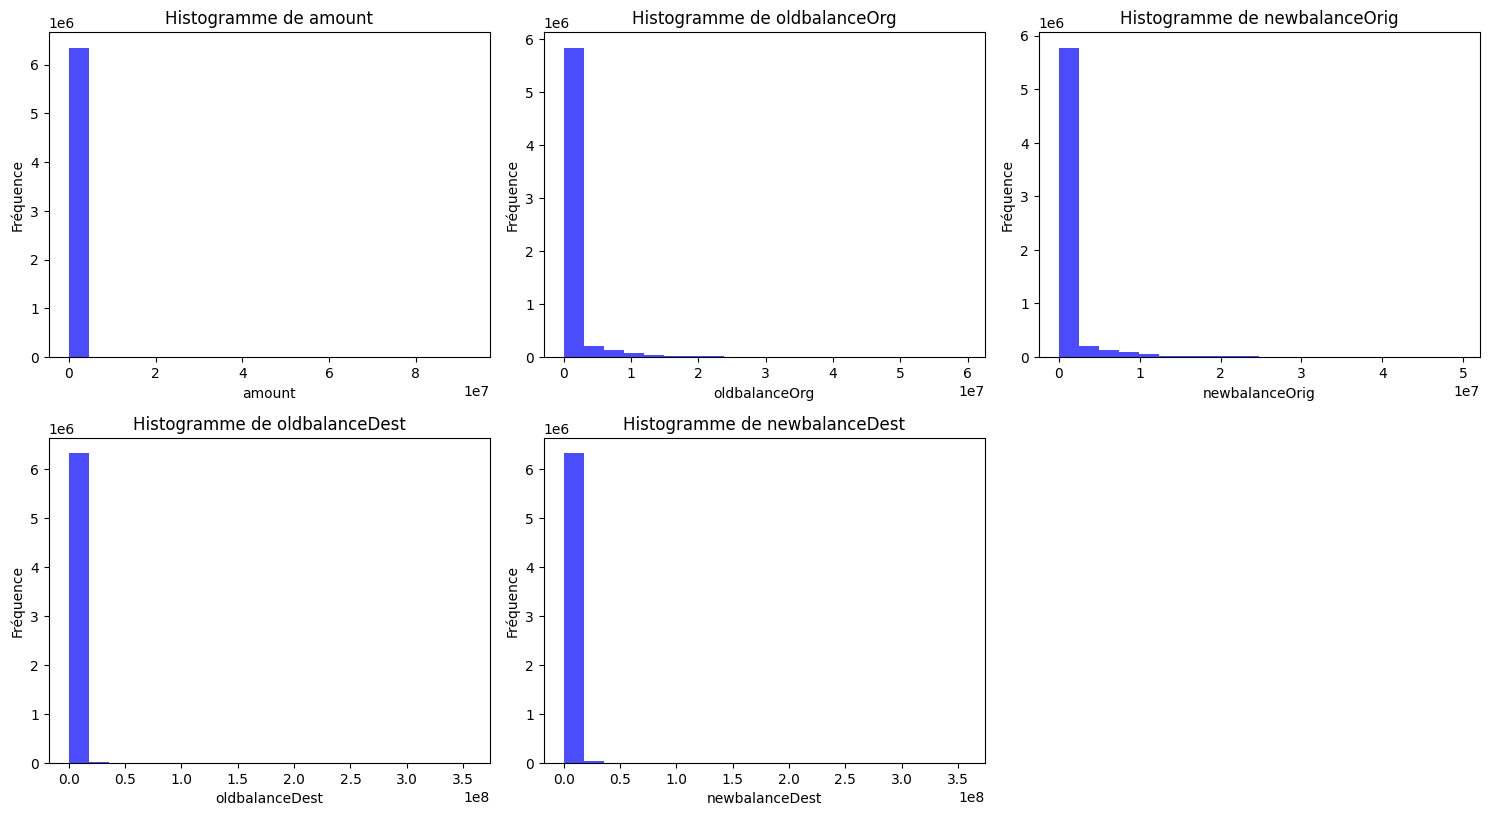

In [54]:
 # Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include='number')
 # Afficher un histogramme pour chaque colonne numérique
plt.figure(figsize=(15, 20))  # Adapter la taille de la figure en fonction du nombre de colonnes
num_cols = len(numeric_columns.columns)
 # Créer une grille de sous-graphiques adaptée au nombre de colonnes numériques
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(5, 3, i + 1)  # Adapté à 15 colonnes numériques
    plt.hist(df[column], bins=20, color='blue', alpha=0.7)
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()
plt.close()

Analyse univariée de la colonne 'type':

Fréquence des catégories :
type
CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: proportion, dtype: float64



<ipython-input-55-2a32bb71e75e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set1')


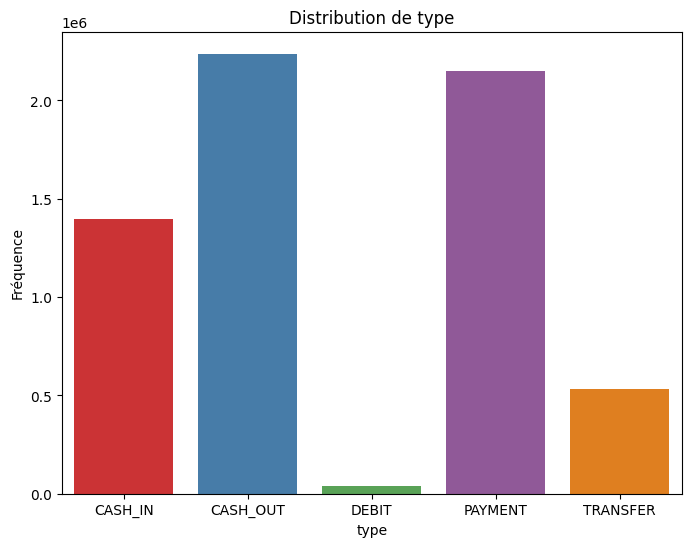

Analyse univariée de la colonne 'isFraud':

Fréquence des catégories :
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64



<ipython-input-55-2a32bb71e75e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set1')


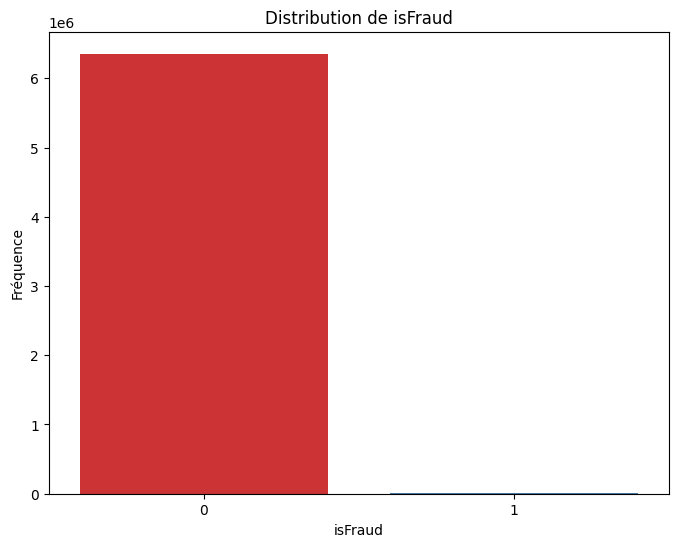

Analyse univariée de la colonne 'isFlaggedFraud':

Fréquence des catégories :
isFlaggedFraud
0    0.999997
1    0.000003
Name: proportion, dtype: float64



<ipython-input-55-2a32bb71e75e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set1')


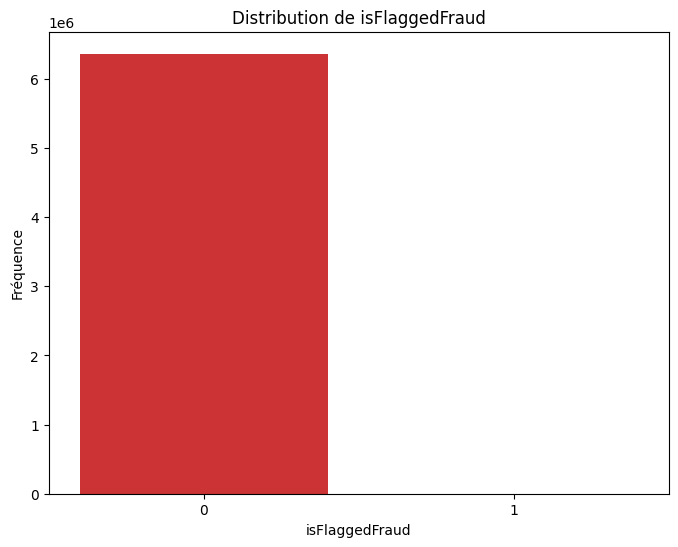

In [55]:
# Diagrammes à barres
for column in df.columns:
  if df[column].dtype == 'category':
      print(f"Analyse univariée de la colonne '{column}':\n")

      # Compter les occurrences de chaque catégorie
      value_counts = df[column].value_counts(normalize=True)
      print(f"Fréquence des catégories :\n{value_counts}\n")

      # Afficher un graphique à barres pour visualiser la distribution
      plt.figure(figsize=(8, 6))
      sns.countplot(data=df, x=column, palette='Set1')
      plt.title(f'Distribution de {column}')
      plt.xlabel(column)
      plt.ylabel('Fréquence')
      plt.show()
      plt.close()

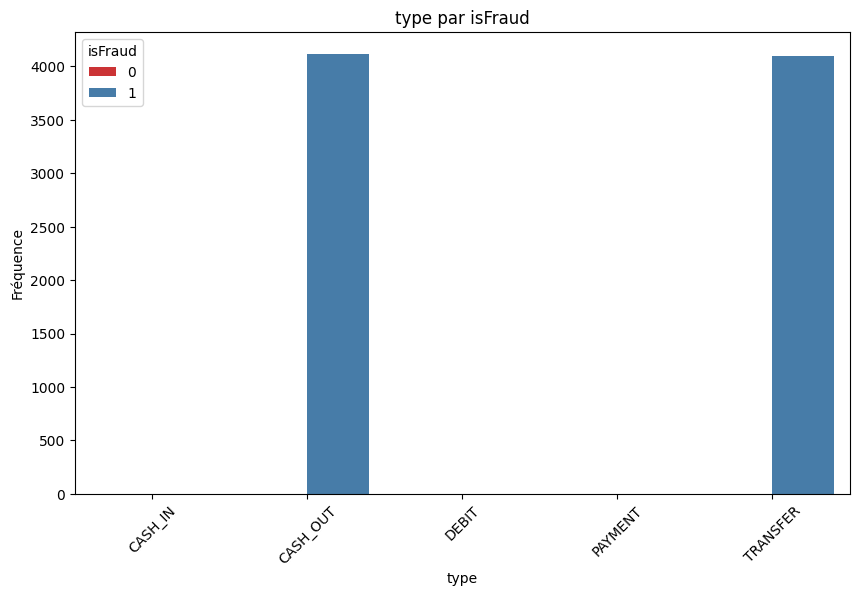

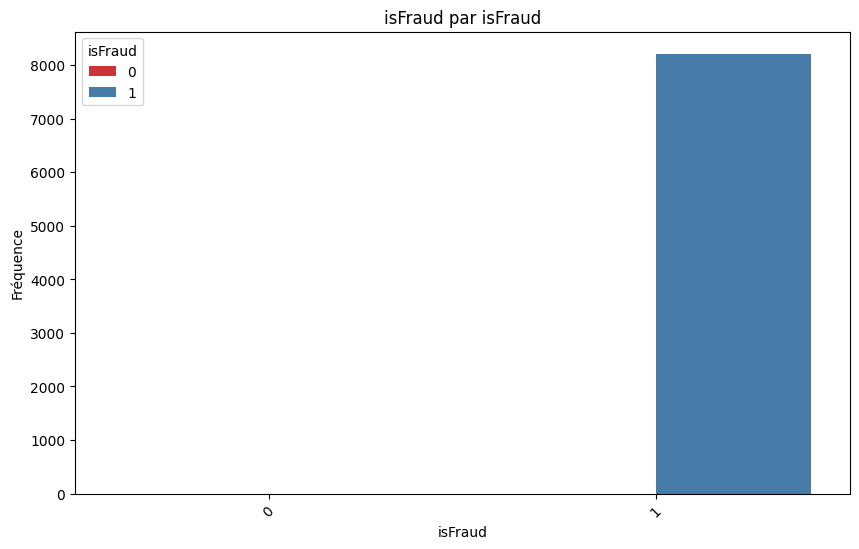

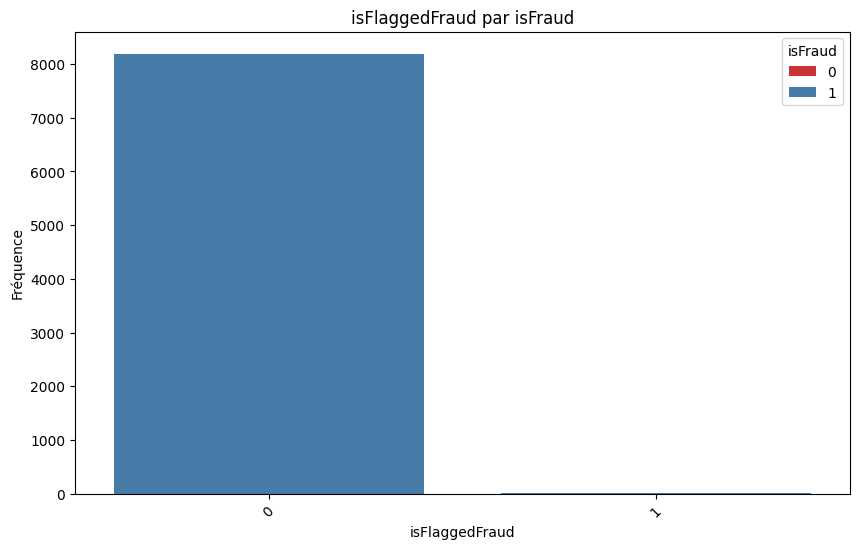

In [56]:
# Créer des graphiques à barres pour chaque colonne
def plot_bar_graphs(df,cat_var):
  for column in df.columns:
    if df[column].dtype == 'category':
      plt.figure(figsize=(10, 6))
      sns.countplot(data=df, x=column, hue=cat_var, palette='Set1')

      # Personnalisation du graphique
      plt.title(column + ' par ' + cat_var)
      plt.xlabel(column)
      plt.ylabel('Fréquence')
      plt.xticks(rotation=45)  # Faire pivoter les étiquettes de l'axe des x pour plus de lisibilité

      # Afficher le graphique
      plt.legend(title=cat_var)
      plt.show()
      plt.close()
plot_bar_graphs(df[df['isFraud']==1],'isFraud')

#Modelisation

In [24]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [29]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
RL_model = LogisticRegression(random_state=42)
RL_model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [40]:
y_pred=RL_model.predict(X_test)

In [41]:
#évaluation du model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[1270762     142]
 [    881     739]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.84      0.46      0.59      1620

    accuracy                           1.00   1272524
   macro avg       0.92      0.73      0.80   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy Score: 0.9991960858891463
